In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines.plotting import plot_lifetimes  # Lifeline package for the Survival Analysis
from lifelines import KaplanMeierFitter
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
import dataframe_image as dfi
warnings.filterwarnings('ignore')  # don't print out warnings

pd.options.display.max_rows = None
pd.options.display.max_columns = 100
plt.style.use('fivethirtyeight')
# plt.style.use('plot_style.txt')


In [23]:
path_to_data = r"C:\Users\Glodaris\Downloads\data.csv"
##  create a dataframe
df = pd.read_csv(path_to_data, na_values=['(NA)']).fillna(0)

# df=pd.read_csv(url, index_col=0, na_values=['(NA)']).fillna(0)

In [24]:
def revision(bools):
    ''' Takes in Boolean class, returns credit default name'''
    if bools == 0:
        return 'Success'
    else:
        return 'Failed'

In [25]:
df.head()

,Time Years,F/U Status,Gn,Age,BMI,Reoperations,Reason Fail,Revision all cause,FU (y),ROM,∆ROM,KSPain,∆KSP,KSTotal,∆KST,KSFnc,∆KSF,XR FU (y)
0,2.10,failed,F,54.50,33.30,revision UKA to TKA 5/15/2007,aseptic loosening,1,5.50,125,5.00,20,20.00,70,21.00,55,5.00,3.00
1,2.00,failed,F,55.60,28.00,Arthroscopy 12/13/2005; revision UKA to TKA 3/...,aseptic loosening,1,15.20,100,-10.00,45,35.00,90,35.00,60,-10.00,11.30
2,1.30,failed,F,41.60,40.90,revision 9/11/07,aseptic loosening,1,15.00,135,20.00,45,0.00,95,22.00,100,60.00,13.30
3,2.40,failed,F,43.70,32.00,revision UKA to TKA 8/19/2008,medial tibial overload,1,10.20,105,-5.00,50,50.00,94,67.00,40,5.00,2.50
4,9.60,failed,F,55.80,28.30,revision UKA to TKA 12/2/2015,tibial collapse,1,15.40,120,0.00,45,35.00,94,55.00,80,10.00,11.70


In [26]:
df.columns

Index(['Time Years', 'F/U Status', 'Gn', 'Age', 'BMI', 'Reoperations',
       'Reason Fail', 'Revision all cause', 'FU (y)', 'ROM', '∆ROM', 'KSPain',
       '∆KSP', 'KSTotal', '∆KST', 'KSFnc', '∆KSF', 'XR FU (y)'],
      dtype='object')

In [27]:
import scipy.stats as stats

In [28]:
col1 = ['FU (y)', 'ROM', 'KSPain', 'KSTotal','KSFnc']

col2 = ['XR FU (y)', '∆ROM', '∆KSP', '∆KST', '∆KSF' ]

pair_test = {}

for i in zip(col1,col2):
    test = stats.ttest_rel(df[i[0]], df[i[1]])
    pair_test[f'{i[0]} vs {i[1]}'] = test
    
    
    

In [29]:
pair_test

{'FU (y) vs XR FU (y)': Ttest_relResult(statistic=19.459513151382584, pvalue=1.4666956192377899e-49),
 'ROM vs ∆ROM': Ttest_relResult(statistic=216.0121185779571, pvalue=3.076790129673387e-256),
 'KSPain vs ∆KSP': Ttest_relResult(statistic=19.151375597544504, pvalue=1.3252761541827914e-48),
 'KSTotal vs ∆KST': Ttest_relResult(statistic=39.00453878491541, pvalue=2.82147957247874e-100),
 'KSFnc vs ∆KSF': Ttest_relResult(statistic=53.423555922361615, pvalue=3.2338207043012303e-127)}

In [33]:
 pair_test['ROM vs ∆ROM'][1]

3.076790129673387e-256

## 1. Percentage breakdown of revision and why it was performed.

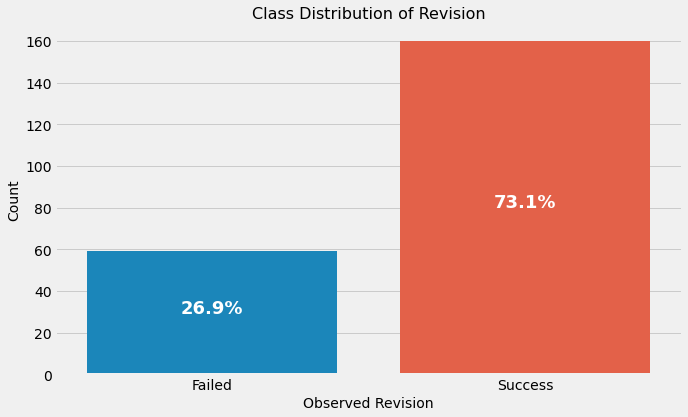

In [5]:
# Apply our loan function
df2 = df.copy(deep=True)
df2['TARGET'] = df2['Revision all cause'].apply(revision)

#set plotting figure
fig = plt.figure(figsize = (10, 6))
#plot a count plot of the target variable
axis = sns.countplot(x = 'TARGET', data = df2);
#set title
axis.set_title('Class Distribution of Revision', size = 16);
#iterate through the count plot
for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(df2)*100, 1)}%", 
            ha = 'center', size = 18, rotation = 0, weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Observed Revision', size = 14)
axis.set_ylabel('Count', size = 14);

In [9]:
count = df2.groupby('Reason Fail')['TARGET'].count()#.apply(lambda x: x*100/x.sum())

In [10]:
revision_df = pd.DataFrame()

In [11]:
revision_df['Count'] = count
revision_df['Percentage']=pd.DataFrame(count).apply(lambda x:x*100/len(df))

In [12]:
revision_df.reset_index(inplace=True)

In [13]:
revision_df.rename(columns={'Reason Fail': 'Reason for Revision'},inplace=True)

In [14]:

# cm = sns.light_palette("orange", as_cmap=True)
 
# # Visualizing the DataFrame with set precision
# revision_df.style.background_gradient(cmap=cm).set_precision(2)
revision_df

,Reason for Revision,Count,Percentage
0,arthritic progression,20,9.13
1,aseptic loosening,20,9.13
2,bearing dislocation,3,1.37
3,infection,1,0.46
4,instability,1,0.46
5,intractable pain,2,0.91
6,medial tibial overload,2,0.91
7,poly damage dt loose cement foreign body,1,0.46
8,tibial collapse,6,2.74
9,unknown,3,1.37


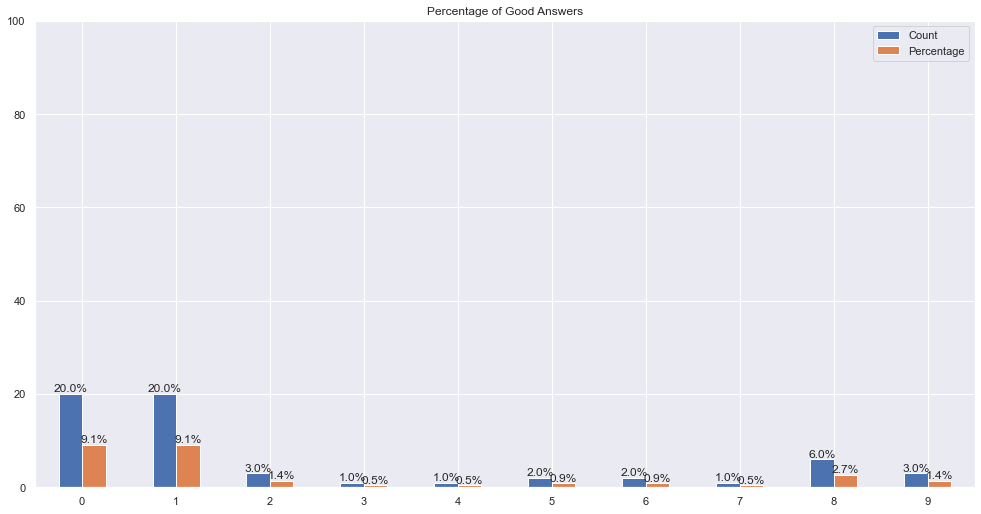

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = revision_df[['Count','Percentage']].plot(
    kind='bar', rot=0,
    title='Percentage of Good Answers',
    ylim=[0, 100],
    label='Percent Good',
    legend = 'Reason for Revision',
)
# Add Labels on Top of Bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()
# plt.legend(bbox_to_anchor=(1.03, 1), loc=3, borderaxespad=0.);


## 2.Percentage breakdown of revision and why it was performed.

### Univariate Analysis

Text(0.5, 1.0, 'Failure vs Nonfailure graph ')

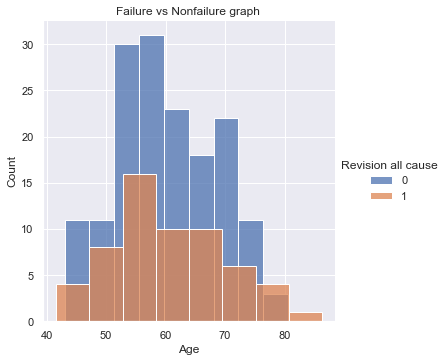

In [16]:
#Distribution plot
sns.set(rc = {'figure.figsize':(20,10)})
sns.FacetGrid(df, hue = "Revision all cause", height=5).map(sns.histplot,"Age").add_legend()
plt.title('Failure vs Nonfailure graph ' )

from the above graph, you can observe that people age 50 to 60 have more survival rate.

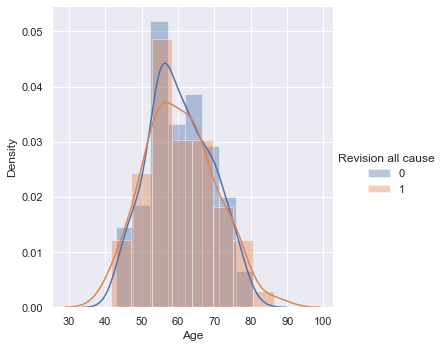

In [17]:
#Distribution plot

sns.FacetGrid(df, hue = "Revision all cause", height=5).map(sns.distplot,"Age").add_legend()

<AxesSubplot:xlabel='Revision all cause', ylabel='Age'>

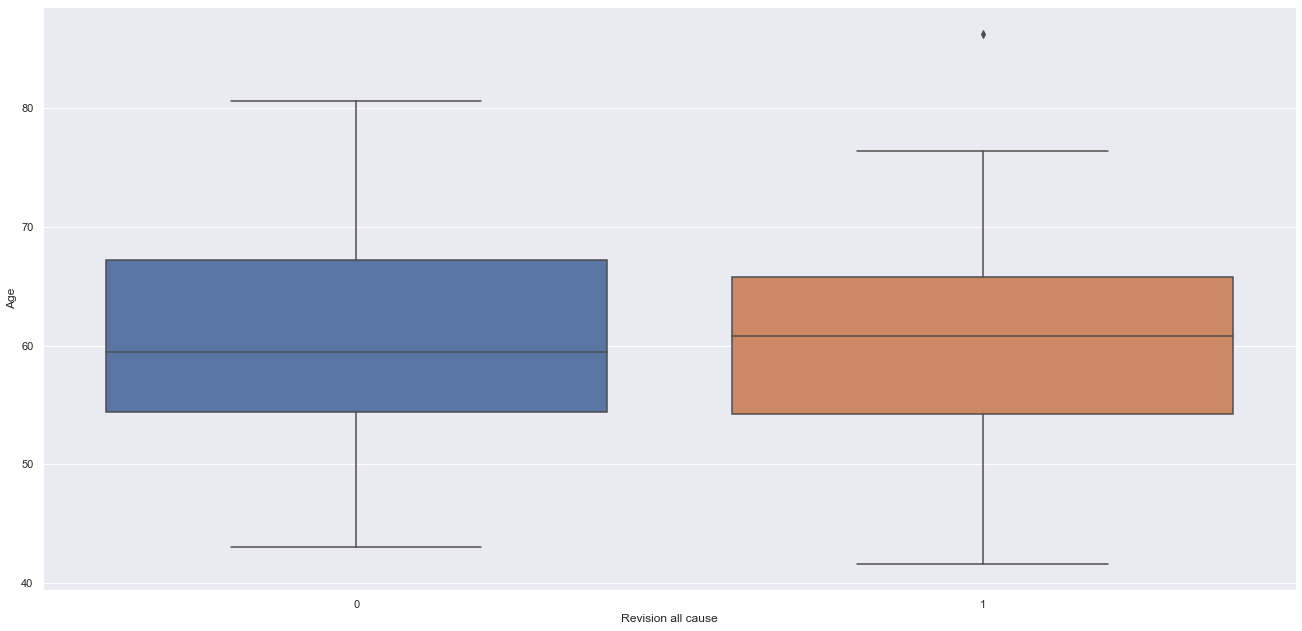

In [18]:
sns.boxplot(x = "Revision all cause", y="Age", data = df)

### Multivariate Analysis

While our Analysis on Survivorship revolves on the entire dataset, it important to note that our primary focus will be on the listed variable our dataset.





#### Multivariate analyses on survivorship
1. **Age**


    i Separate on greater than 65
    ii Separate on less than 65
    
2. **BMI**

    i  Separate on less than 40
    
    ii Separate on greater than 40
    
    
3. **Gender**

   i Men 
   
   iiWomen


### Calculating Summary Statistics for Multivariate Data

In [19]:

# cm = sns.light_palette("purple", as_cmap=True)
 

dmap = {'M':1, 'F': 0}
df['Gender'] = df['Gn'].map(dmap)
multi_df = df[['Age', 'BMI','Gender', 'Revision all cause']]
# multi_df.describe()
# multi_df.describe().style.background_gradient(cmap=cm).set_precision(2)
multi_df.describe()

,Age,BMI,Gender,Revision all cause
count,219.00,219.00,219.00,219.00
mean,60.46,32.47,0.40,0.27
std,8.79,6.34,0.49,0.44
min,41.60,19.70,0.00,0.00
25%,54.40,28.00,0.00,0.00
50%,59.50,31.20,0.00,0.00
75%,66.60,35.55,1.00,1.00
max,86.30,57.70,1.00,1.00


### Calculating Correlations for Multivariate Data

It is often of interest to investigate whether any of the variables in a multivariate data set are significantly correlated.




One common way of plotting multivariate data is to make a Pairplot scatterplot, showing each pair of variables plotted against each other. We can use the Pairplot() function from the seaborn package to do this.

<Figure size 1008x720 with 0 Axes>

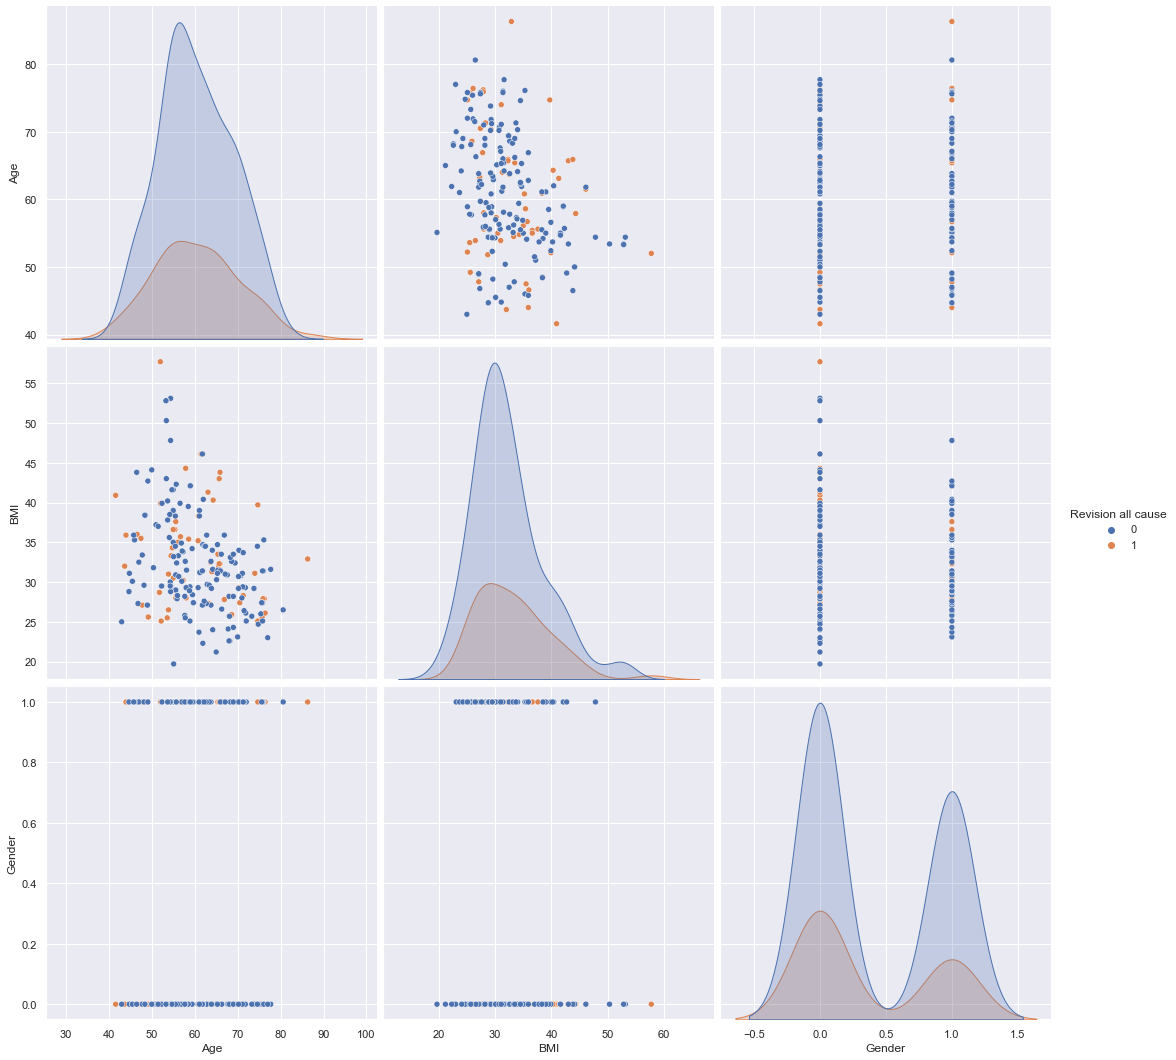

In [20]:

plt.figure(figsize=(14, 10));

sns.pairplot(multi_df, hue="Revision all cause", height=5, diag_kind="kde");

In this matrix pairplot, the diagonal cells show kde of each of the variables.

The function mosthighlycorrelated() will print out the linear correlation coefficients for each pair of variables in your data set, in order of the correlation coefficient. This lets you see very easily which pair of variables are most highly correlated.

In [21]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [22]:
mosthighlycorrelated(multi_df,6)

,FirstVariable,SecondVariable,Correlation
0,Age,BMI,-0.31
1,BMI,Gender,-0.13
2,BMI,Revision all cause,0.07
3,Gender,Revision all cause,-0.06
4,Age,Gender,0.01
5,Age,Revision all cause,0.00


Let's take a deeper drive into  our dataset to understand some of the underlying relationships based on some certain conditions

### A Pairplot with the Data Points Labelled by their Group

For example, in the matrix pairplot  above, the cell in the second column of the first row down is a pairplot of BMI (x-axis) against Age (y-axis). If you look at this pairplot, it appears that there may be a Negative relationship between BMI and Age.

We may therefore decide to examine the relationship between BMI and Age more closely, by plotting a scatterplot of these two variables, with the data points labelled by their group(Revision all Cause)

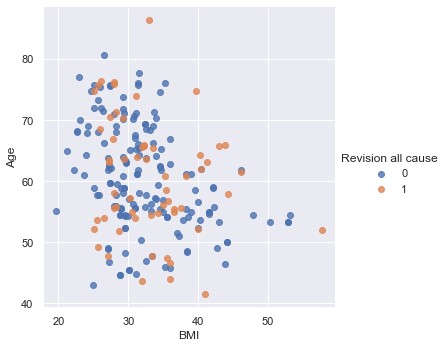

In [23]:
sns.lmplot("BMI", "Age", data=multi_df, hue="Revision all cause", fit_reg=False);

Les't analyse age based on certain condition. e.g **Age range > 65** and **< than 65**

In [24]:
Age_greater_65 = multi_df.loc[(multi_df['Age'] >= 65)]

In [25]:
Age_less_65 = multi_df.loc[~(multi_df['Age'] >= 65)]

Text(0.5, 1.0, 'Correlation Heatmap Plot on Age greater than 65 with other variables')

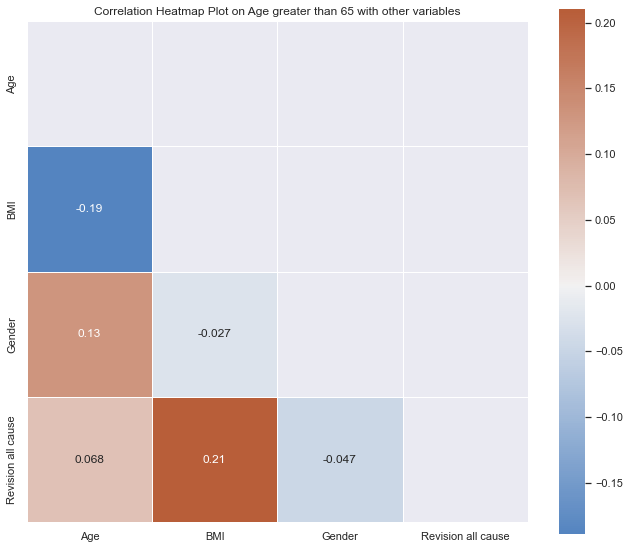

In [26]:
# Correlation Heatmap
corr = Age_greater_65.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.title('Correlation Heatmap Plot on Age greater than 65 with other variables' )

Text(0.5, 1.0, 'Correlation Heatmap Plot on Age less than 65 with other variables')

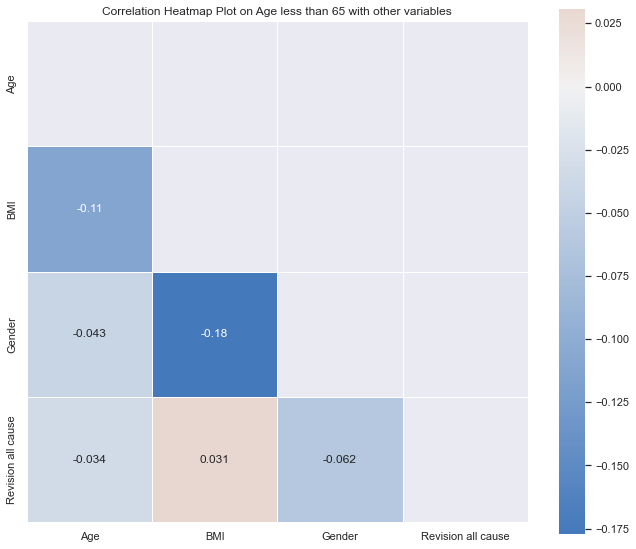

In [27]:
# Correlation Heatmap
corr = Age_less_65.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.title('Correlation Heatmap Plot on Age less than 65 with other variables' )

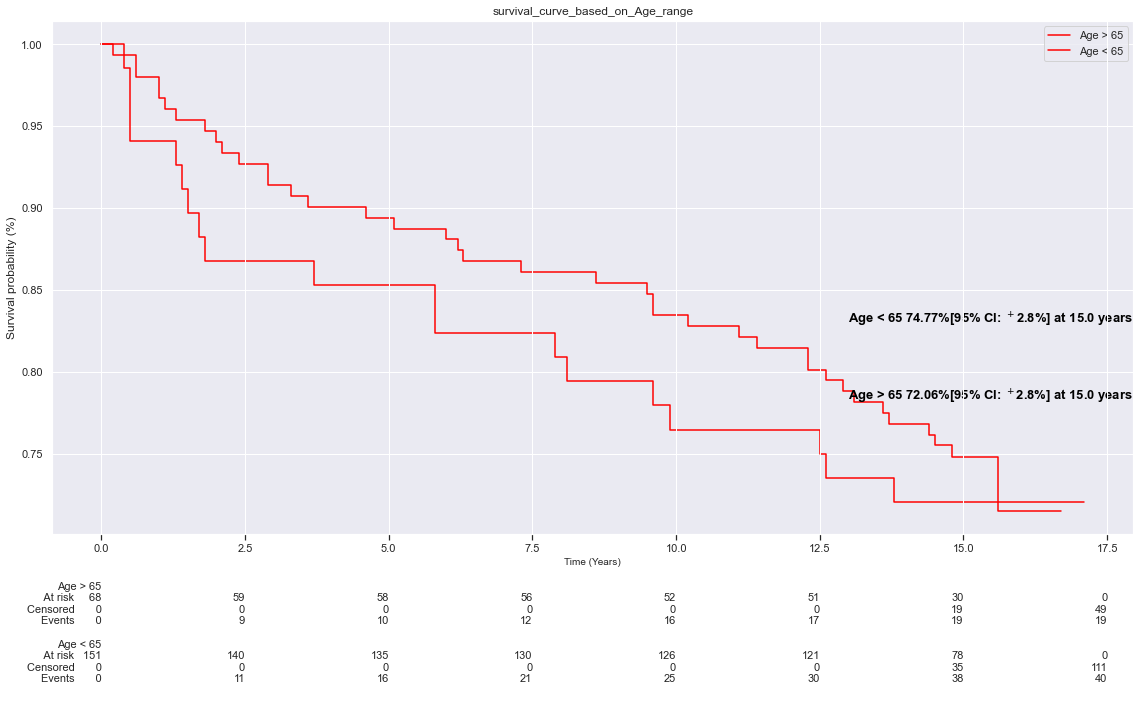

In [28]:
fig = plt.figure(figsize=(16, 10))
ix = df['Age'] > 65
df.loc[ix]
ax = plt.subplot(111)

z = np.array([1,0,1,0,1])
colors = np.array(["red", "red"])
kmf_age_greater_65 = KaplanMeierFitter()
ax = kmf_age_greater_65.fit(df.loc[ix]['Time Years'], df.loc[ix]['Revision all cause'], label='Age > 65').plot_survival_function(ax=ax, c=colors[z],ci_show=False)
age_greater_65_surviival_table = kmf_age_greater_65.survival_function_.reset_index().rename(columns = {'timeline':'More Than 65 years Survival time','Kaplan Meier survival curve':'Survival Probability'})
age_greater_65_surviival_table = age_greater_65_surviival_table[age_greater_65_surviival_table['More Than 65 years Survival time'] <= 15.00]
age_greater_65_years = age_greater_65_surviival_table.tail()[-1:].values[0][0]
age_greater_65_percentage = age_greater_65_surviival_table.tail()[-1:].values[0][1]*100
ax.text(1, 0.25,str('Age > 65 {0}%[95% CI: $^+$2.8%] at {1} years'.format(round((age_greater_65_percentage),2),round((age_greater_65_years),2))), verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
        color = 'black', fontsize = 13,weight='bold')

kmf_age_less_65 = KaplanMeierFitter()
ax = kmf_age_less_65.fit(df.loc[~ix]['Time Years'], df.loc[~ix]['Revision all cause'], label='Age < 65').plot_survival_function(ax=ax, c=colors[z],ci_show=False)
age_less_65_surviival_table = kmf_age_less_65.survival_function_.reset_index().rename(columns = {'timeline':'Less Than 65 years Survival time','Kaplan Meier survival curve':'Survival Probability'})
age_less_65_surviival_table = age_less_65_surviival_table[age_less_65_surviival_table['Less Than 65 years Survival time'] <= 15.00]
age_less_65_years = age_less_65_surviival_table.tail()[-1:].values[0][0]
age_less_65_percentage = age_less_65_surviival_table.tail()[-1:].values[0][1]*100
ax.text(1, 0.40,str('Age < 65 {0}%[95% CI: $^+$2.8%] at {1} years'.format(round((age_less_65_percentage),2),round((age_less_65_years),2))), verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
        color = 'black', fontsize = 13,weight='bold')

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_age_greater_65, kmf_age_less_65, ax=ax)
plt.title('survival_curve_based_on_Age_range')
ax.set_ylabel('Survival probability (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

How do we interpret this? The y-axis represents the probability a patient whose age is greater than or less than 65 years is still around after t years, where t years is on the x-axis. We see that patients whose age is less than 65 years have higher  survivor probability than those whose age is greater than 65 years.

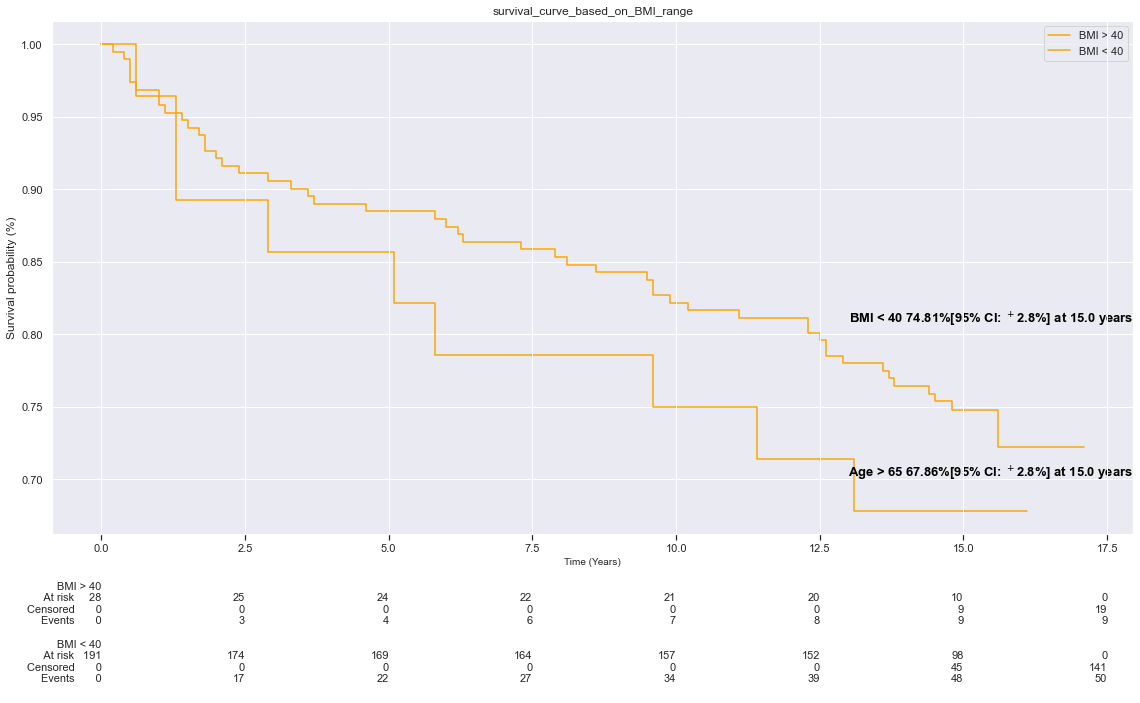

In [29]:
fig = plt.figure(figsize=(16, 10))
ix = df['BMI'] > 40
df.loc[ix]
ax = plt.subplot(111)

z = np.array([1,0,1,0,1])
colors = np.array(["green", "orange"])
kmf_bmi_greater_40 = KaplanMeierFitter()
ax = kmf_bmi_greater_40.fit(df.loc[ix]['Time Years'], df.loc[ix]['Revision all cause'], label='BMI > 40').plot_survival_function(ax=ax, c=colors[z],ci_show=False)
bmi_greater_40_survival_table = kmf_bmi_greater_40.survival_function_.reset_index().rename(columns = {'timeline':'More Than 40 BMI Survival time','Kaplan Meier survival curve':'Survival Probability'})
bmi_greater_40_survival_table = bmi_greater_40_survival_table[bmi_greater_40_survival_table['More Than 40 BMI Survival time'] <= 15.00]
bmi_greater_40_years = bmi_greater_40_survival_table.tail()[-1:].values[0][0]
bmi_greater_40_percentage = bmi_greater_40_survival_table.tail()[-1:].values[0][1]*100
ax.text(1, 0.10,str('Age > 65 {0}%[95% CI: $^+$2.8%] at {1} years'.format(round((bmi_greater_40_percentage),2),round((bmi_greater_40_years),2))), verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
        color = 'black', fontsize = 13,weight='bold')

kmf_bmi_less_40 = KaplanMeierFitter()
ax = kmf_bmi_less_40.fit(df.loc[~ix]['Time Years'], df.loc[~ix]['Revision all cause'], label='BMI < 40').plot_survival_function(ax=ax, c=colors[z],ci_show=False)
bmi_less_40_survival_table = kmf_bmi_less_40.survival_function_.reset_index().rename(columns = {'timeline':'Less Than 40 BMI Survival time','Kaplan Meier survival curve':'Survival Probability'})
bmi_less_40_survival_table = bmi_less_40_survival_table[bmi_less_40_survival_table['Less Than 40 BMI Survival time'] <= 15.00]
bmi_less_40 = bmi_less_40_survival_table.tail()[-1:].values[0][0]
bmi_less_40_percentage = bmi_less_40_survival_table.tail()[-1:].values[0][1]*100
ax.text(1, 0.40,str('BMI < 40 {0}%[95% CI: $^+$2.8%] at {1} years'.format(round((bmi_less_40_percentage),2),round((bmi_less_40),2))), verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
        color = 'black', fontsize = 13,weight='bold')

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_bmi_greater_40, kmf_bmi_less_40, ax=ax)
plt.title('survival_curve_based_on_BMI_range')
ax.set_ylabel('Survival probability (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

How do we interpret this? The y-axis represents the probability a patient whose age is greater than or less than 40 BMI is still around after t years, where t years is on the x-axis. We see that patients whose BMI is less than 40 years have higher survivor probability **(make it past 15 years)** than those whose BMI is greater than 40.

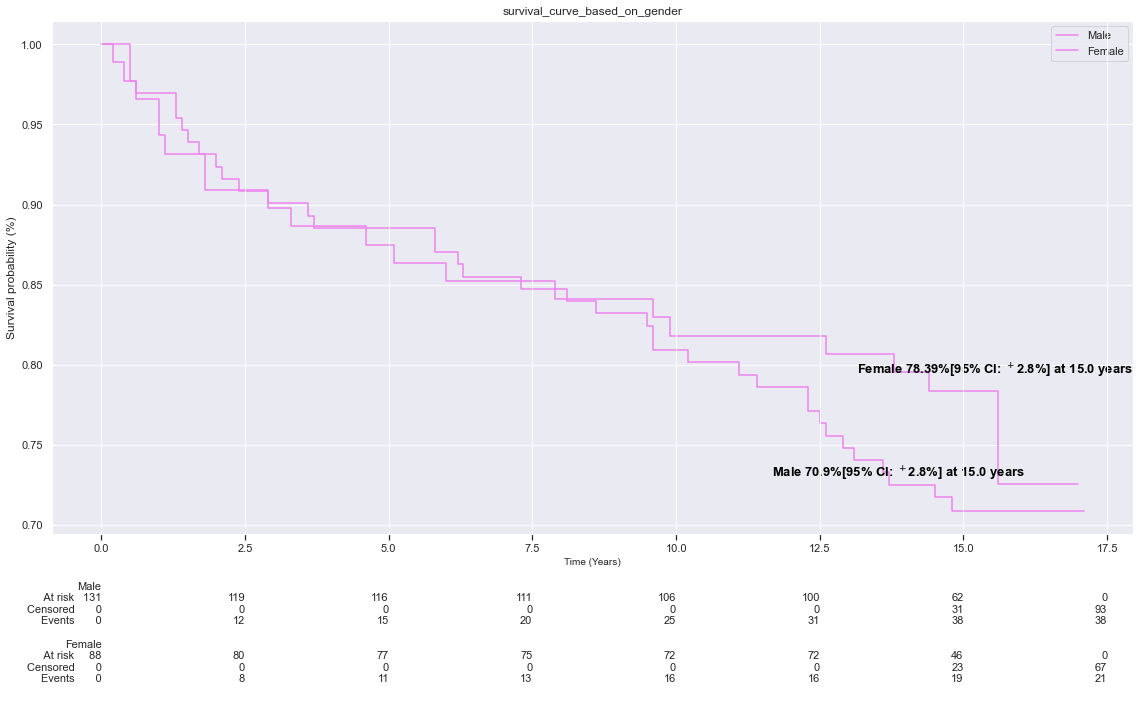

In [30]:
fig = plt.figure(figsize=(16, 10))
ix = df['Gn'] == 'F'

ax = plt.subplot(111)

z = np.array([1,0,1,0,1])
colors = np.array(["violet", "violet"])

kmf_male = KaplanMeierFitter()
ax = kmf_male.fit(df.loc[ix]['Time Years'], df.loc[ix]['Revision all cause'], label='Male').plot_survival_function(ax=ax, c=colors[z],ci_show=False)
male_surviival_table = kmf_male.survival_function_.reset_index().rename(columns = {'timeline':'Male Survival time','Kaplan Meier survival curve':'Survival Proportion'})
male_surviival_table = male_surviival_table[male_surviival_table['Male Survival time'] <= 15.00]
male_years = male_surviival_table.tail()[-1:].values[0][0]
male_percentage = male_surviival_table.tail()[-1:].values[0][1]*100
ax.text(0.9, 0.1,str('Male {0}%[95% CI: $^+$2.8%] at {1} years'.format(round((male_percentage),2),round((male_years),2))), verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
        color = 'black', fontsize = 13,weight='bold')

kmf_female = KaplanMeierFitter()
ax = kmf_female.fit(df.loc[~ix]['Time Years'], df.loc[~ix]['Revision all cause'], label='Female').plot_survival_function(ax=ax,c=colors[z], ci_show=False)
female_surviival_table = kmf_female.survival_function_.reset_index().rename(columns = {'timeline':'Female Survival time','Kaplan Meier survival curve':'Survival Proportion'})
female_surviival_table = female_surviival_table[female_surviival_table['Female Survival time'] <= 15.00]
female_years = female_surviival_table.tail()[-1:].values[0][0]
female_percentage = female_surviival_table.tail()[-1:].values[0][1]*100
ax.text(1, 0.30,str('Female {0}%[95% CI: $^+$2.8%] at {1} years'.format(round((female_percentage),2),round((female_years),2))), verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
        color = 'black', fontsize = 13,weight='bold')


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_male, kmf_female, ax=ax)
plt.title('survival_curve_based_on_gender')
ax.set_ylabel('Survival probability (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

How do we interpret this? The y-axis represents the probability of Genders who are still around after t years, where t years is on the x-axis. We see that female patients have higher survivor probability than male patients. what is the reason for this...?

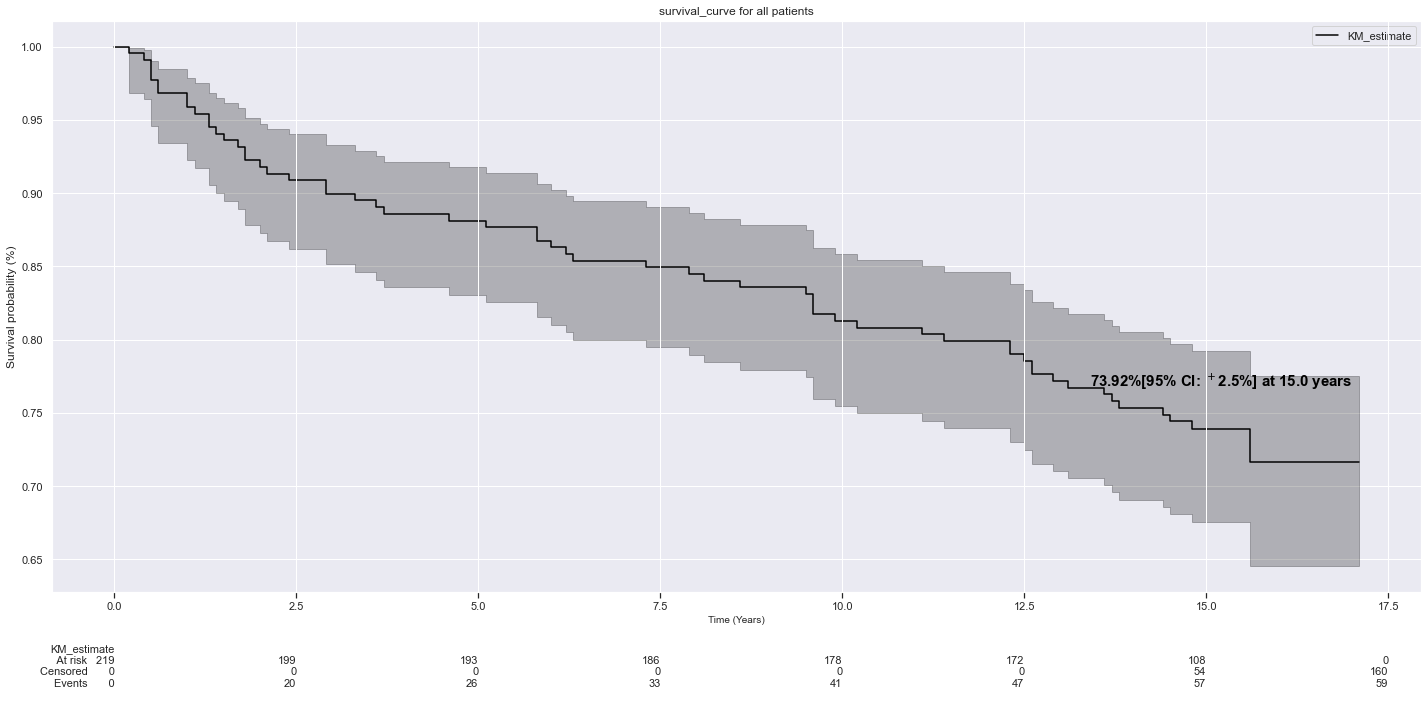

In [51]:
ax = plt.subplot(111)
z = np.array([1,0,1,0,1])
colors = np.array(["red", "black"])
kmf = KaplanMeierFitter()

x = kmf.fit(df['Time Years'], df['Revision all cause']).plot_survival_function(ax=ax, c=colors[z])
surviival_table = kmf.survival_function_.reset_index().rename(columns = {'timeline':'Survival time','Kaplan Meier survival curve':'Survival Proportion'})
surviival_table = surviival_table[surviival_table['Survival time'] <= 15.00]
years = surviival_table.tail()[-1:].values[0][0]
percentage = surviival_table.tail()[-1:].values[0][1]*100
ax.text(0.95, 0.35,str('{0}%[95% CI: $^+$2.5%] at {1} years'.format(round((percentage),2),round((years),2))), verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
        color = 'black', fontsize = 15,weight='bold')

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf, ax=ax)

plt.title('survival_curve for all patients')
ax.set_ylabel('Survival probability (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

In [ ]:
# z = np.array([1,0,1,0,1])
# colors = np.array(["red", "red"]) c=colors[z]
ax = plt.subplot(111)
kmf_m.plot_survival_function(ax=ax,ci_show=False)
kmf_f.plot_survival_function(ax=ax,ci_show=False)



from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_m, kmf_f, ax=ax)
plt.title('survival_curve_based_on_gender')
ax.set_ylabel('Survival probability (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

**Lets compare the different types of Reason for Revision in the dataset:**

In [ ]:
df2 = df[df['Revision all cause']==1]
reason_types = df2['Reason Fail'].unique()
T = df2["Time Years"]
E = df2["Revision all cause"]
kmf = KaplanMeierFitter()

for i, reason_type in enumerate(reason_types):
    ax = plt.subplot(2, 5, i + 1)

    ix = df['Reason Fail'] == reason_type
    kmf.fit(T[ix], E[ix])
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(reason_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. of Reason for Revision $n$ years')

plt.tight_layout()

## 3.Reason for failure

In [ ]:
# fig = plt.figure(figsize=(16, 10))
_, ax = plt.subplots(1, 1)

g1 = sns.scatterplot(data=df2, y="Reason Fail", x="Time Years", hue="Revision all cause", style="Revision all cause",palette=["black"], markers='X',s=70)
g1.set(title='Reason for failure')
g1.set(xlabel='Duration of follow-up(yrs)');
g1.set(ylabel=None);

## 4.Create a patient table

In [ ]:
df.head()

In [ ]:
final = df.groupby(['Reoperations','Reason Fail'],as_index=False)[['Reoperations','Time Years']].mean()

In [ ]:
# final.rename(columns={'Reason Fail': 'Reason for Revision'},inplace=True)

In [ ]:
final

In [ ]:
dfi.export(final, 'Patient table.png')

basically we go through each patient that needed a revision and report the time they had it, why they had it.

In [ ]:
# Import seaborn library
import seaborn as sns
 
# Declaring the cm variable by the
# color palette from seaborn
cm = sns.light_palette("green", as_cmap=True)
 
# Visualizing the DataFrame with set precision
final.style.background_gradient(cmap=cm).set_precision(2)